<a href="https://colab.research.google.com/github/GauraoM/Data-Analysis-for-Python/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1.Missing Data

In [2]:
# Checking for null values
# pd.isna(np.nan)
pd.isnull(np.nan)

True

In [3]:
pd.isnull(pd.Series([1, np.nan, 8]))

0    False
1     True
2    False
dtype: bool

In [4]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])

In [7]:
# Total Null values
# s.isnull()
# s.isna()
pd.isnull(s).sum()

2

In [10]:
s[pd.isnull(s)]

3   NaN
4   NaN
dtype: float64

In [11]:
# Not null values
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

### 2.Handling Missing Values
#### Dropping na values

In [12]:
# Dropping rows containg any single 'na' values
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

#### Filling na Values

In [13]:
# Forward filling
s.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [14]:
# Backward filling
s.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

#### 3.Cleaning Not null values

In [17]:
df = pd.DataFrame({
    "Sex":['M','F','M','D','?'],
    "Age":[26,23,23,25,30]
})
df

,Sex,Age
0,M,26
1,F,23
2,M,23
3,D,25
4,?,30


In [18]:
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [20]:
df['Sex'].value_counts()

M    2
F    1
D    1
?    1
Name: Sex, dtype: int64

In [23]:
df['Sex'].replace({'D':'F','?':'M'})

0    M
1    F
2    M
3    F
4    M
Name: Sex, dtype: object

#### Splitting Columns

In [28]:
df = pd.DataFrame({
    'data':[
            '1987_M_US_1',
            '1990?_M_UK_1',
            '1992_F_US_2',
            '1970?_M_ IT_1',
            '1985_F_I T_2'
    ]
})

In [29]:
df

,data
0,1987_M_US_1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [30]:
df['data'].str.split('_')

0      [1987, M, US, 1]
1     [1990?, M, UK, 1]
2      [1992, F, US, 2]
3    [1970?, M,  IT, 1]
4     [1985, F, I T, 2]
Name: data, dtype: object

In [34]:
# Converting to dataframe
df = df['data'].str.split('_',expand = True)

In [36]:
df.columns = ['Year','Sex','Country','No Children']
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [42]:
df['Country'].str.strip()

0     US
1     UK
2     US
3     IT
4    I T
Name: Country, dtype: object

In [43]:
df['Country'].str.replace(' ','')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

### 4.Data Visualization

#### Global API

In [45]:
x = np.arange(-10,11)

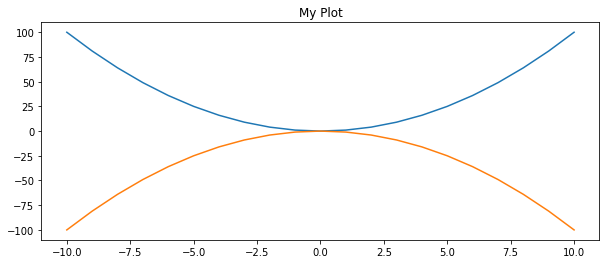

In [51]:
plt.figure(figsize=(10,4))
plt.title('My Plot')
plt.plot(x, x**2)
plt.plot(x, -1*(x**2))

Text(0, 0.5, 'x squared')

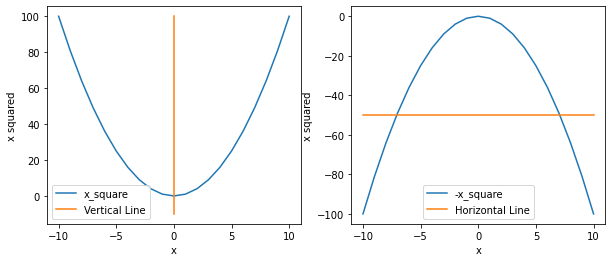

In [53]:
plt.figure(figsize=(10,4))
plt.title('My Plot')
# Creating subplot
plt.subplot(1,2,1)
# Plotting
plt.plot(x, x**2)
plt.plot([0,0,0], [-10,0,100])
plt.legend(["x_square","Vertical Line"])
# Giving name to x and y axis
plt.xlabel('x')
plt.ylabel('x squared')

# Creating subplot
plt.subplot(1,2,2)
# Plotting
plt.plot(x, -1*(x**2))
plt.plot([-10,0,10], [-50,-50,-50])
plt.legend(["-x_square","Horizontal Line"])
# Giving name to x and y axis
plt.xlabel('x')
plt.ylabel('x squared')

#### OOP Interface(When you want to more control)

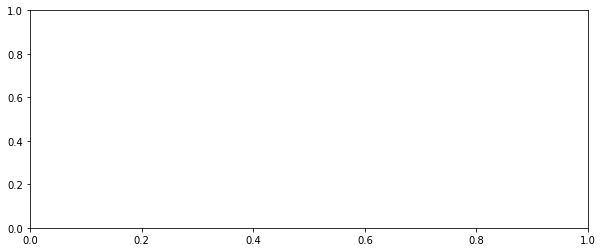

In [54]:
fig,axes = plt.subplots(figsize=(10,4))

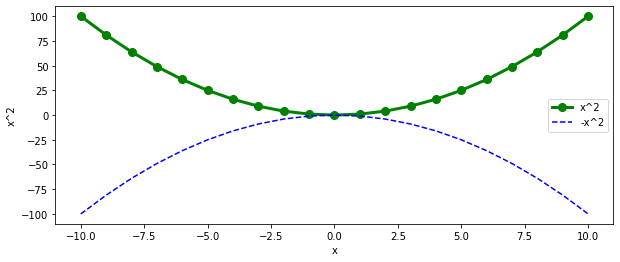

In [55]:
axes.plot(x,(x**2), color="green", linewidth=3, marker='o', markersize=8, label='x^2')
axes.plot(x, -1*(x**2), 'b--', label='-x^2' )
axes.set_xlabel("x")
axes.set_ylabel('x^2')
axes.legend()
fig